In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('DataTable_Dryad.csv')

In [4]:
# AI Generated function. since the xslx to csv converter messed up, I asked Gemini for help with a helper function to change the names of the first row to the column name
#  Replace current column names with the values from the first row, then remove that row
new_names = {}
for i, col in enumerate(df.columns):
    val = df.iat[0, i]
    # keep original name if first-row value is missing
    new_names[col] = col if pd.isna(val) else str(val).strip()

df.rename(columns=new_names, inplace=True)

# drop the first row (header row) and reset the index
df = df.drop(df.index[0]).reset_index(drop=True)

# show the updated dataframe head to verify
df.head()

,Patient number,Cell id,'IQ',"'Cortical depth of the cell from pia, um'","'TDL, mm'",'Number of branch points','Relative cortical depth',First AP rise speed,'APriseSpeed All First APs bin1','APriseSpeed 20-40 Hz','APriseSpeed 20-40 Hz relative values',"'Average cortical thickness temporal lobe, mm'","'Cortical Thickness Left, mm'","'Cortical Thickness Right, mm'","'Cortical Thickness resected hemisphere, mm'",Cut-off frequency [Hz],Phase slope [1/ms]
0,1,P001_Cell01M,88,978,14.34,56,0.41,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
1,1,P001_Cell02M,88,1029,15.21,67,0.43,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
2,1,P001_Cell03M,88,1071,16.89,74,0.45,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
3,1,P001_Cell04M,88,1168,19.72,85,0.49,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
4,2,P002_Cell01M,78,616,14.36,55,0.22,NaN,NaN,NaN,NaN,2.73,2.72,2.75,2.75,338.68,17.26


In [5]:
# renaming columns, for standardization and to remove quotation marks from column name
df.rename(columns={"'IQ'": 'iq', "Cell id": 'cell_id', 'Patient number': 'patient_number', "'Cortical depth of the cell from pia, um'": 'cortical_depth_from_pia(um)', "'TDL, mm'": 'tot_dendritic_length'}, inplace=True)
df.rename(columns={"'Number of branch points'":'num_branch_points', "'Relative cortical depth'":'relative_cortical_depth', 'First AP rise speed': 'first_ap_rise_speed', "'APriseSpeed All First APs bin1'": 'ap_rise_speed_all_first_aps_bin1',"'APriseSpeed 20-40 Hz'": 'ap_rise_speed_20-40hz', "'APriseSpeed 20-40 Hz relative values'":'ap_rise_speed_20-40hz_relative', "'Average cortical thickness temporal lobe, mm'":'avg_cortical_thickness_temporal(mm)', "'Cortical Thickness Left, mm'":'cortical_thickness_left(mm)',"'Cortical Thickness Right, mm'":'cortical_thickness_right(mm)', "'Cortical Thickness resected hemisphere, mm'":'cortical_thickness_respected_hemi(mm)', 'Cut-off frequency [Hz]':'cut-off_freq(hz)', 'Phase slope [1/ms]':'phase_slope(1/ms)'}, inplace=True)
# df.head()

In [6]:
num_columns = list(df.columns)
num_columns.remove('cell_id') # not numeric

for i in num_columns: # turn numeric columns to numbers instead of strings to perform computations
    df[i] = pd.to_numeric(df[i], errors='coerce') 
df.head()

,patient_number,cell_id,iq,cortical_depth_from_pia(um),tot_dendritic_length,num_branch_points,relative_cortical_depth,first_ap_rise_speed,ap_rise_speed_all_first_aps_bin1,ap_rise_speed_20-40hz,ap_rise_speed_20-40hz_relative,avg_cortical_thickness_temporal(mm),cortical_thickness_left(mm),cortical_thickness_right(mm),cortical_thickness_respected_hemi(mm),cut-off_freq(hz),Phase slope [1/ms]
0,1.0,P001_Cell01M,88.0,978.0,14.34,56.0,0.41,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
1,1.0,P001_Cell02M,88.0,1029.0,15.21,67.0,0.43,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
2,1.0,P001_Cell03M,88.0,1071.0,16.89,74.0,0.45,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
3,1.0,P001_Cell04M,88.0,1168.0,19.72,85.0,0.49,NaN,NaN,NaN,NaN,2.45,2.49,2.40,2.40,NaN,NaN
4,2.0,P002_Cell01M,78.0,616.0,14.36,55.0,0.22,NaN,NaN,NaN,NaN,2.73,2.72,2.75,2.75,338.68,17.26


In [7]:
df.to_csv('dryad_fixed.csv')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'patient_number'),
  Text(1, 0, 'iq'),
  Text(2, 0, 'cortical_depth_from_pia(um)'),
  Text(3, 0, 'tot_dendritic_length'),
  Text(4, 0, 'num_branch_points'),
  Text(5, 0, 'relative_cortical_depth'),
  Text(6, 0, 'first_ap_rise_speed'),
  Text(7, 0, 'ap_rise_speed_all_first_aps_bin1'),
  Text(8, 0, 'ap_rise_speed_20-40hz'),
  Text(9, 0, 'ap_rise_speed_20-40hz_relative'),
  Text(10, 0, 'avg_cortical_thickness_temporal(mm)'),
  Text(11, 0, 'cortical_thickness_left(mm)'),
  Text(12, 0, 'cortical_thickness_right(mm)'),
  Text(13, 0, 'cortical_thickness_respected_hemi(mm)'),
  Text(14, 0, 'cut-off_freq(hz)'),
  Text(15, 0, 'Phase  slope [1/ms]')])

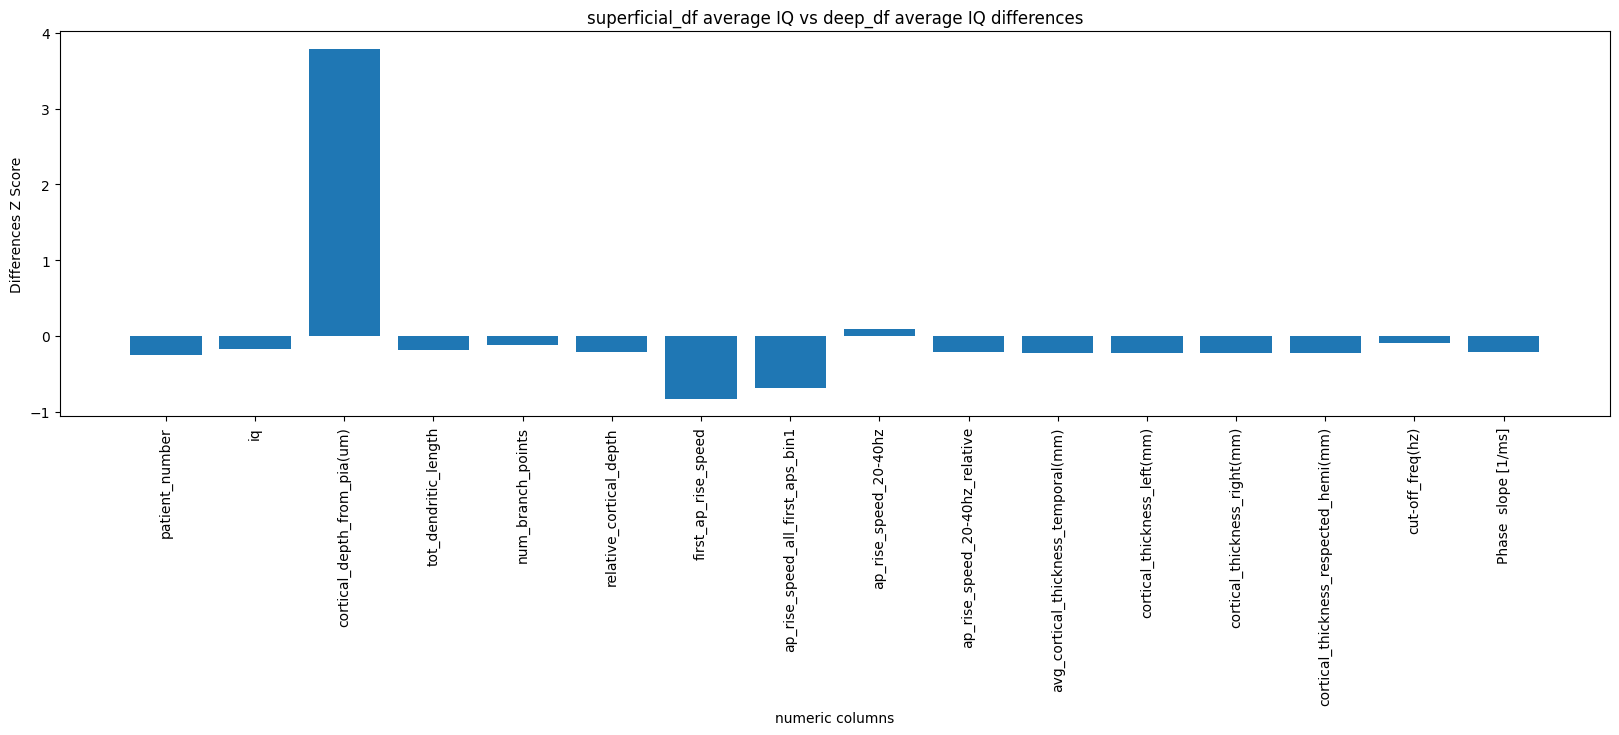

In [8]:
# find any differences between superficial cortical neurons and deep cortical neurons based on the difference function from class
superficial_df = df[df['relative_cortical_depth'] < .39]
deep_df = df[df['relative_cortical_depth'] >= .39]

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# Set up the figure
fig,ax = plt.subplots(figsize=(20,5))

differences = []
for i in df.columns:
    if i in num_columns:
        superficial_df_mean = superficial_df[i].mean()
        deep_df_mean = deep_df[i].mean()
        differences.append(deep_df_mean-superficial_df_mean)
diff_zscore = stats.zscore(differences)
plt.bar(num_columns, diff_zscore)
plt.xlabel('numeric columns')
plt.ylabel('Differences Z Score')
plt.title('superficial_df average IQ vs deep_df average IQ differences')
plt.xticks(rotation=90)

In [16]:
print(len(deep_df))
print(len(superficial_df))

32
28


Text(0, 0.5, 'Total Dendritic Length (mm)')

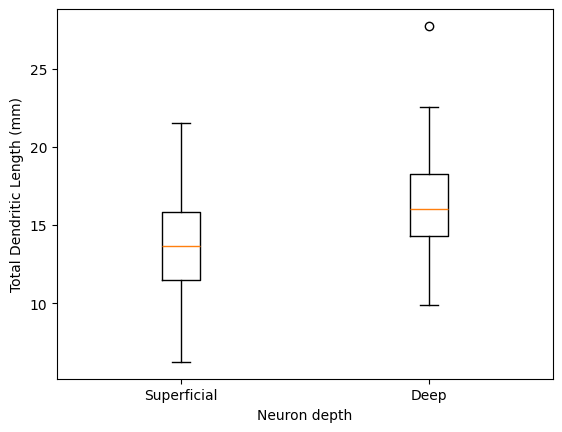

In [15]:
fig, ax = plt.subplots()
superficial_dendritic_length = superficial_df['tot_dendritic_length']
deep_dendritic_length = deep_df['tot_dendritic_length']
data = [superficial_dendritic_length, deep_dendritic_length]
ax.boxplot(data)
plt.xticks([1,2],['Superficial', 'Deep'])
plt.xlabel('Neuron depth')
plt.ylabel('Total Dendritic Length (mm)')